# Using and updating GIS content

The GIS is a warehouse of geographic content and services. arcgis includes several classes to make use of the content and services.

To get to the content, we use the <b><code>gis.content.search()</code></b> method:

In [1]:
from arcgis.gis import *
gis = GIS()

We can search for basemaps, such as the Stamen watercolor basemap:

In [2]:
stamenbasemap = gis.content.search('watercolor')[0]

In [3]:
stamenbasemap

<Item title:"Stamen Watercolor" type:Web Map owner:cartogeek>

We can then use this basemap item to create a Map in arcgis:

In [6]:
from arcgis.viz import MapView
map = MapView(item=stamenbasemap)

In [7]:
map

The GIS also contains other services such as geocoders. We can search for the Esri World Geocoder item...

In [8]:
from IPython.display import display
geocoderitems = gis.content.search('world geocoding',max_items=3)
for item in geocoderitems:
    display(item)

<Item title:"ArcGIS Runtime SDK" type:Web Map owner:astauffer>

<Item title:"World Geocoding" type:Geocoding Service owner:esri>

<Item title:"World Bank - Projects" type:Map Service owner:Intl_User_Community>

In [9]:
geocoderitem = geocoderitems[1]

... and create and use a Geocoder instance with this item:

In [10]:
from arcgis.tools import Geocoder
geocoder = Geocoder(geocoderitem)

In [11]:
map.zoom=13

In [12]:
map.center = geocoder.find_best_match("Times Square")

In [13]:
scene = gis.content.search('pictometry', 'web scene')[0]

In [14]:
scene

<Item title:"Pictometry 3D Scene" type:Web Scene owner:whitepeterj>

In [15]:
from arcgis.viz import *
picwebscene = WebScene(scene)

In [ ]:
picwebscene

The GIS contains several different types of content and arcgis provides the API to use, modify and update it.

In [17]:
portal = GIS("https://dev04875.esri.com/arcgis", "portaladmin", "portaladmin")

In [18]:
mapitem = portal.content.search('World Cities', 'web map')[0]

<Item title:"World Cities" type:Web Map owner:portaladmin>
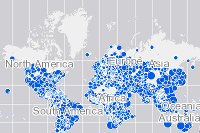

In [19]:
mapitem

In [20]:
webmap = WebMap(mapitem)

In [ ]:
webmap

Uncomment the lines below to replace  old server url with new server url (or vice versa). The changes can be saved back to the webmap item using webmap.update():

In [22]:
newserver = 'dev00930.esri.com'
oldserver = 'dev04875.esri.com'

for lyr in  webmap['operationalLayers']:
    if 'url' in lyr:
        print(lyr['url'])
        lyr['url'] = lyr['url'].replace(oldserver, newserver)
        
webmap.update()

https://dev04875.esri.com/arcgis/rest/services/SampleWorldCities/MapServer
